# KDEF Dataset

In [ ]:
#Importing required libraries 
import numpy as np
import math 
import os, sys 
import shutil
import cv2
from google.colab.patches import cv2_imshow
import imutils
import pickle
import random 
import matplotlib.pyplot as plt
import string

import torch 
from torch import Tensor
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
from typing import Callable, List, Optional, Tuple
from torch.nn.utils.rnn import pad_sequence 
from torch.optim.lr_scheduler import MultiStepLR, StepLR
import torch.optim as optim

from tqdm.notebook import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Preprocessing

### Download the dataset files from website to your google drive 

In [ ]:
!wget -P /content/drive/My\ Drive/ https://www.kdef.se/download/KDEF_and_AKDEF.zip

In [ ]:
!unzip '/content/drive/My Drive/KDEF_and_AKDEF.zip' -d/content/data

In [ ]:
# Load the cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
def face_detector(img):
    # Convert into grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detect faces
    faces = face_cascade.detectMultiScale(gray,1.3)
    for (x, y, w, h) in faces:
        crop_img = img[y:y+h, x:x+w]
        crop_img = cv2.resize(crop_img, (158,158))
        return crop_img

In [ ]:
session = ['A']
gender = ['F', 'M']
identity = [i for i in range(1,36)]
expression = ['DI', 'HA', 'NE', 'SU']
angle = ['S']

img_names = []

for s in session:
  for g in gender:
    for i in identity:
      if i < 10:
        idn = '0' + str(i)
      else:
        idn = str(i)  
      folder_name = s + g + idn
      for e in expression:
        for a in angle:
          image_name = folder_name + e + a + '.JPG'
          img = cv2.imread("/content/data/KDEF_and_AKDEF/KDEF/"+folder_name+"/"+image_name)
          cropped_img = face_detector(img)  #(158,158,3)
          # rotate
          rotated_image0 = imutils.rotate(cropped_img, angle=0)
          rotated_image90 = imutils.rotate(cropped_img, angle=90)
          rotated_image180 = imutils.rotate(cropped_img, angle=180)
          rotated_image270 = imutils.rotate(cropped_img, angle=270)
          # mirror
          rotated_image0_mirror = np.fliplr(rotated_image0)
          rotated_image90_mirror = np.flipud(rotated_image90)
          rotated_image180_mirror = np.fliplr(rotated_image180)
          rotated_image270_mirror = np.flipud(rotated_image270)
          # save transformed images in Drive & save transformed images names
          new_img_name = folder_name + e + a + '_000N' + '.JPG'
          img_names.append(new_img_name)
          cv2.imwrite('/content/drive/My Drive/images_A/'+new_img_name , rotated_image0)

          new_img_name = folder_name + e + a + '_090N' + '.JPG'
          img_names.append(new_img_name)
          cv2.imwrite('/content/drive/My Drive/images_A/'+new_img_name , rotated_image90)

          new_img_name = folder_name + e + a + '_180N' + '.JPG'
          img_names.append(new_img_name)
          cv2.imwrite('/content/drive/My Drive/images_A/'+new_img_name , rotated_image180)

          new_img_name = folder_name + e + a + '_270N' + '.JPG'
          img_names.append(new_img_name)
          cv2.imwrite('/content/drive/My Drive/images_A/'+new_img_name , rotated_image270)

          new_img_name = folder_name + e + a + '_000R' + '.JPG'
          img_names.append(new_img_name)
          cv2.imwrite('/content/drive/My Drive/images_A/'+new_img_name , rotated_image0_mirror)

          new_img_name = folder_name + e + a + '_090R' + '.JPG'
          img_names.append(new_img_name)
          cv2.imwrite('/content/drive/My Drive/images_A/'+new_img_name , rotated_image90_mirror)

          new_img_name = folder_name + e + a + '_180R' + '.JPG'
          img_names.append(new_img_name)
          cv2.imwrite('/content/drive/My Drive/images_A/'+new_img_name , rotated_image180_mirror)

          new_img_name = folder_name + e + a + '_270R' + '.JPG'
          img_names.append(new_img_name)
          cv2.imwrite('/content/drive/My Drive/images_A/'+new_img_name , rotated_image270_mirror)


In [ ]:
# save
with open("new_names.txt", "wb") as fp:   #Pickling
    pickle.dump(img_names, fp)

!cp "/content/new_names.txt" "/content/drive/My Drive"        

### Load the dataset to colab directory 

In [ ]:
!unzip "/content/drive/My Drive/images_A.zip" -d "/content"

Archive:  /content/drive/My Drive/images_A.zip
  inflating: /content/images_A/AM35SUS_270N.JPG  
  inflating: /content/images_A/AM35HAS_180N.JPG  
  inflating: /content/images_A/AM35HAS_000R.JPG  
  inflating: /content/images_A/AM35NES_180N.JPG  
  inflating: /content/images_A/AM35NES_180R.JPG  
  inflating: /content/images_A/AM35SUS_090R.JPG  
  inflating: /content/images_A/AM35HAS_090R.JPG  
  inflating: /content/images_A/AM35SUS_090N.JPG  
  inflating: /content/images_A/AM35SUS_270R.JPG  
  inflating: /content/images_A/AM35HAS_270N.JPG  
  inflating: /content/images_A/AM35DIS_270R.JPG  
  inflating: /content/images_A/AM35HAS_180R.JPG  
  inflating: /content/images_A/AM35HAS_000N.JPG  
  inflating: /content/images_A/AM35SUS_000R.JPG  
  inflating: /content/images_A/AM35SUS_180N.JPG  
  inflating: /content/images_A/AM35NES_270R.JPG  
  inflating: /content/images_A/AM35SUS_180R.JPG  
  inflating: /content/images_A/AM35HAS_090N.JPG  
  inflating: /content/images_A/AM35NES_000N.JPG  
  i

In [ ]:
# load
with open(r"/content/drive/My Drive/new_names.txt", "rb") as fp:   # Unpickling
    img_names = pickle.load(fp)

### Dataset 

In [ ]:
gender = ['F', 'M']
identity = [i for i in range(1,36)]
identities = {}
k = 0
for g in gender:
    for i in identity:
        if i < 10:
          idn = '0' + str(i)
        else:
          idn = str(i)

        identities[g+idn] = k
        k += 1

In [ ]:
expression = ['DI', 'HA', 'NE', 'SU']
emotions = {}
k = 0
for e in expression:   
      emotions[e] = k
      k += 1

In [ ]:
transform = ['000', '090', '180', '270']
transforms = {}
k = 0
for t in transform:   
      transforms[t] = k
      k += 1

In [ ]:
class KDEFDataset(torch.utils.data.Dataset):
    def __init__(self, indices, train=True):
        self.indices = indices
        self.train = train 

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, ind):
        if self.train:
            img_name = train_image_names[ind]
            img = cv2.imread("/content/images_A/"+ img_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # create identity one-hot vector
            idn_one_hot = torch.zeros(70,1)
            idn_number = identities[img_name[1:4]]
            idn_one_hot[idn_number,0] = 1

            # create emotion one-hot vector
            emotion_one_hot = torch.zeros(4,1)
            emotion_number = emotions[img_name[4:6]]
            emotion_one_hot[emotion_number,0] = 1

            # create transformation one-hot vector
            transform_one_hot = torch.zeros(4,1)
            transform_number = transforms[img_name[8:11]]
            transform_one_hot[transform_number,0] = 1

        else:
            img_name = test_image_names[ind]
            img = cv2.imread("/content/images_A/"+img_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # create identity one-hot vector
            idn_one_hot = torch.zeros(70,1)
            idn_number = identities[img_name[1:4]]
            idn_one_hot[idn_number,0] = 1

            # create emotion one-hot vector
            emotion_one_hot = torch.zeros(4,1)
            emotion_number = emotions[img_name[4:6]]
            emotion_one_hot[emotion_number,0] = 1

            # create transformation one-hot vector
            transform_one_hot = torch.zeros(4,1)
            transform_number = transforms[img_name[8:11]]
            transform_one_hot[transform_number,0] = 1   


        return torch.from_numpy(img).permute(2,0,1), idn_one_hot.squeeze(), emotion_one_hot.squeeze(), transform_one_hot.squeeze()

### Train Test Split

In [ ]:
torch.manual_seed(10)
random.seed(10)

num_samples = len(img_names)

test_image_names = ['AF28NES_000N.JPG','AF28NES_000R.JPG',
                    'AF10SUS_090N.JPG','AF10SUS_090R.JPG',
                    'AM11DIS_180N.JPG','AM11DIS_180R.JPG',
                    'AM08HAS_270N.JPG','AM08HAS_270R.JPG',
                    'AF31DIS_000N.JPG', 'AF31DIS_000R.JPG', 'AF31DIS_090N.JPG', 'AF31DIS_090R.JPG', 'AF31DIS_180N.JPG', 'AF31DIS_180R.JPG', 'AF31DIS_270N.JPG', 'AF31DIS_270R.JPG',
                    'AM15SUS_000N.JPG', 'AM15SUS_000R.JPG', 'AM15SUS_090N.JPG', 'AM15SUS_090R.JPG', 'AM15SUS_180N.JPG', 'AM15SUS_180R.JPG', 'AM15SUS_270N.JPG', 'AM15SUS_270R.JPG',
                    ]

train_image_names = list( set(img_names) - set(test_image_names) )
random.shuffle(train_image_names)

train_indices = [i for i in range(len(train_image_names))]
test_indices =  [i for i in range(len(test_image_names))]
val_indices = train_indices[-50:]
train_indices = train_indices [:-50]
partition_data = {'train' : train_indices , 
                  'validation' : val_indices,
                  'test' : test_indices}         

In [ ]:
# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
torch.backends.cudnn.benchmark = True

In [ ]:
device

## GCN Network

In [ ]:
class _generator(nn.Module):

    def __init__(self):
        super(_generator, self).__init__()
        
        self.lrelu = nn.LeakyReLU(0.1)
        
        self.fc1_prs = nn.Linear(70, 256)
        self.fc1_emt = nn.Linear(4, 256)
        self.fc1_trns = nn.Linear(4, 128)

        self.fc2_prs = nn.Linear(256, 512)
        self.fc2_emt = nn.Linear(256, 512)
        self.fc2_trns = nn.Linear(128, 256)

        self.fc3 = nn.Linear(1280, 2048)

        self.fc4 = nn.Linear(2048, 2048)

        self.fc5 = nn.Linear(2048, 16384)

        self.uconv6 = nn.ConvTranspose2d(256, 512, 5, stride = 2)

        self.uconv7 = nn.ConvTranspose2d(512, 184, 5, stride = 2, padding = 1)

        self.uconv8 = nn.ConvTranspose2d(184, 184, 5, stride = 2, padding = 1)

        self.uconv9 = nn.ConvTranspose2d(184, 3, 2, stride = 2)

    def forward(self, x_prs, x_emt, x_trns):
        x_prs = self.fc1_prs(x_prs)
        x_emt = self.fc1_emt(x_emt)
        x_trns = self.fc1_trns(x_trns)

        x_prs = self.lrelu(x_prs)
        x_emt = self.lrelu(x_emt)
        x_trns = self.lrelu(x_trns)

        x_prs = self.fc2_prs(x_prs)
        x_emt = self.fc2_emt(x_emt)
        x_trns = self.fc2_trns(x_trns)

        x = torch.cat((x_prs,x_emt,x_trns), dim = 1)
        x = self.lrelu(x)

        x = self.fc3(x)
        x = self.lrelu(x)

        x = self.fc4(x)
        x = self.lrelu(x)

        x = self.fc5(x)
        x = self.lrelu(x)

        x = x.view(-1, 256, 8, 8)
        
        x = self.uconv6(x)
        x = self.lrelu(x)

        x = self.uconv7(x)
        x = self.lrelu(x)

        x = self.uconv8(x)
        x = self.lrelu(x)

        x = self.uconv9(x)

        return x 

In [ ]:
class _classifier1(nn.Module):
  def __init__(self):
    super(_classifier1,self).__init__()

    alexnet=models.alexnet()
    features=alexnet.features
    features[0]=nn.Conv2d(3,64,kernel_size=(11, 11),stride=(2,2),padding=(2, 2))
    features[1]=nn.LeakyReLU(negative_slope=0.2, inplace=True)
    features[4]=nn.LeakyReLU(negative_slope=0.2, inplace=True)
    features[7]=nn.LeakyReLU(negative_slope=0.2, inplace=True)
    features[9]=nn.LeakyReLU(negative_slope=0.2, inplace=True)
    features[11]=nn.LeakyReLU(negative_slope=0.2, inplace=True)
    features=list(features.children())
    features.insert(2,nn.BatchNorm2d(64))
    features.insert(6,nn.BatchNorm2d(192))
    self.features = nn.Sequential(*features)

    layers_list=[nn.Linear(256*8*8,4096),
                 nn.LeakyReLU(negative_slope=0.2, inplace=True),
                 nn.Dropout(0.5),
                 nn.Linear(4096,4096),
                 nn.LeakyReLU(negative_slope=0.2, inplace=True),
                 nn.Dropout(0.5)]

    person_clsfr_layers=layers_list+[nn.Linear(4096,70)]
    emotion_clsfr_layers=layers_list+[nn.Linear(4096,4)]
    transformation_clsfr_layers=layers_list+[nn.Linear(4096,4)]

    self.flatten=nn.Flatten()

    self.pr_classifier=nn.Sequential(*person_clsfr_layers)
    self.emo_classifier=nn.Sequential(*emotion_clsfr_layers)
    self.tr_classifier=nn.Sequential(*transformation_clsfr_layers)

  def forward(self,x):
    x=self.features(x)
    x=self.flatten(x)

    persons=self.pr_classifier(x)
    emotions=self.emo_classifier(x)
    transformations=self.tr_classifier(x)

    return persons,emotions,transformations

In [ ]:
class GCN(nn.Module):

    def __init__(self):
        super(GCN, self).__init__()
        
        self.gen = _generator()
        self.clsf = _classifier1()

    def forward(self, x_prs, x_emt, x_trns):
        img_pred = self.gen(x_prs, x_emt, x_trns)
        x_prs_pred, x_emt_pred, x_trns_pred = self.clsf(img_pred)

        return img_pred, x_prs_pred, x_emt_pred, x_trns_pred

## Training 

In [ ]:
torch.manual_seed(2045)
random.seed(2045)

training_set = KDEFDataset(partition_data['train'])

training_loader = torch.utils.data.DataLoader(training_set, batch_size= 64,
                                             shuffle=True, num_workers=2)

val_set = KDEFDataset(partition_data['validation'])

validation_loader = torch.utils.data.DataLoader(val_set, batch_size= 64,
                                             shuffle=True, num_workers=2) 


# Hyperparameters
learning_rate = 2e-4
max_epochs = 100

# Model
model = GCN()
model = model.to(device)

# Define Loss function and Optimizer
criterion1 = nn.CrossEntropyLoss()
criterion2 = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr = learning_rate, betas=(0.9, 0.99), eps=1e-8)
scheduler = StepLR(optimizer, step_size = 150, gamma = 0.5)

train_losses = []
validation_losses = []

train_accs = []
val_accs = []

# torch.autograd.set_detect_anomaly(True)
for epoch in tqdm(range(max_epochs)):
    running_trainloss, running_valloss, running_loss, train_acc = 0.0, 0.0, 0.0, 0.0
    train_cnt, val_cnt = 0, 0
        
    # Training
    for batch_train_img, batch_train_x_prs, batch_train_x_emt, batch_train_x_trns in tqdm(training_loader):
        batch_train_img = batch_train_img.float()
        # Transfer to GPU
        batch_train_img, batch_train_x_prs =  batch_train_img.to(device), batch_train_x_prs.to(device)  
        batch_train_x_emt, batch_train_x_trns = batch_train_x_emt.to(device), batch_train_x_trns.to(device) 

        # zero the parameter gradients
        optimizer.zero_grad()
        
        # Model computations
        # forward + backward + optimize
        batch_train_img_pred, batch_train_x_prs_pred, batch_train_x_emt_pred, batch_train_x_trns_pred = model(batch_train_x_prs, batch_train_x_emt, batch_train_x_trns)

        loss1 = criterion1(batch_train_x_prs_pred,torch.argmax(batch_train_x_prs, dim = 1))
        loss2 = criterion1(batch_train_x_emt_pred,torch.argmax(batch_train_x_emt, dim = 1))
        loss3 = criterion1(batch_train_x_trns_pred,torch.argmax(batch_train_x_trns, dim = 1))
        loss4 = criterion2(batch_train_img_pred,batch_train_img)

        loss = 10 * loss1 + 10 * loss2 + 10 * loss3 + loss4 
        loss.backward()

        # # Clip to avoid exploding gradient issues, makes sure grads are within a healthy range
        nn.utils.clip_grad_norm_(model.parameters(), max_norm= 1,error_if_nonfinite= False)

        optimizer.step()

        # print statistics
        running_trainloss += loss.item()
        running_loss += loss.item()

        train_acc += torch.sum(torch.argmax(batch_train_x_emt_pred, dim =1) == torch.argmax(batch_train_x_emt, dim =1)) / batch_train_x_emt.shape[0]

        if train_cnt % 34 == 33:    # print every 10 mini-batches
            print("Cost of Train data after %i iterations in epoch %i : %f" %(train_cnt + 1,epoch + 1, running_loss / 34))
            running_loss = 0.0
        
        train_cnt += 1
    
    #Validation
    running_loss, val_acc = 0.0, 0.0

    with torch.set_grad_enabled(False):
        for batch_img, batch_x_prs, batch_x_emt, batch_x_trns in tqdm(validation_loader):
            batch_img = batch_img.float()
            # Transfer to GPU
            batch_img, batch_x_prs =  batch_img.to(device), batch_x_prs.to(device)  
            batch_x_emt, batch_x_trns = batch_x_emt.to(device), batch_x_trns.to(device) 
            
            # Model computations
            # forward + backward + optimize
            batch_img_pred, batch_x_prs_pred, batch_x_emt_pred, batch_x_trns_pred = model(batch_x_prs, batch_x_emt, batch_x_trns)

            val_loss1 = criterion1(batch_x_prs_pred,torch.argmax(batch_x_prs, dim = 1))
            val_loss2 = criterion1(batch_x_emt_pred,torch.argmax(batch_x_emt, dim = 1))
            val_loss3 = criterion1(batch_x_trns_pred,torch.argmax(batch_x_trns, dim = 1))
            val_loss4 = criterion2(batch_img_pred,batch_img)

            val_loss = 10 * val_loss1 + 10 * val_loss2 + 10 * val_loss3 + loss4 
            running_valloss += val_loss.item()
            running_loss += val_loss.item()

            val_acc += torch.sum(torch.argmax(batch_x_emt_pred, dim =1) == torch.argmax(batch_x_emt, dim =1)) / batch_x_emt.shape[0]

            print("Cost of Validation data after %i iterations in epoch %i : %f" %(val_cnt + 1,epoch + 1, running_loss ))
            running_loss = 0.0

            val_cnt += 1

    scheduler.step()
    train_losses.append(running_trainloss / train_cnt)
    train_accs.append(train_acc.item() / train_cnt * 100)
    validation_losses.append(running_valloss / val_cnt)
    val_accs.append(val_acc.item() / val_cnt * 100)

Cost of Train data after 34 iterations in epoch 1 : 215.022302



Cost of Validation data after 1 iterations in epoch 1 : 207.731674



Cost of Train data after 34 iterations in epoch 2 : 213.380824



Cost of Validation data after 1 iterations in epoch 2 : 263.296448



Cost of Train data after 34 iterations in epoch 3 : 212.497431



Cost of Validation data after 1 iterations in epoch 3 : 216.400818



Cost of Train data after 34 iterations in epoch 4 : 212.297471



Cost of Validation data after 1 iterations in epoch 4 : 225.944565



Cost of Train data after 34 iterations in epoch 5 : 211.793241



Cost of Validation data after 1 iterations in epoch 5 : 216.909119



Cost of Train data after 34 iterations in epoch 6 : 211.988912



Cost of Validation data after 1 iterations in epoch 6 : 228.645325



Cost of Train data after 34 iterations in epoch 7 : 211.681449



Cost of Validation data after 1 iterations in epoch 7 : 203.472305



Cost of Train data after 34 iterations in epoch 8 : 211.871387



Cost of Validation data after 1 iterations in epoch 8 : 225.274323



Cost of Train data after 34 iterations in epoch 9 : 211.499146



Cost of Validation data after 1 iterations in epoch 9 : 207.286850



Cost of Train data after 34 iterations in epoch 10 : 211.554224



Cost of Validation data after 1 iterations in epoch 10 : 218.886444



Cost of Train data after 34 iterations in epoch 11 : 211.511320



Cost of Validation data after 1 iterations in epoch 11 : 212.148895



Cost of Train data after 34 iterations in epoch 12 : 211.375530



Cost of Validation data after 1 iterations in epoch 12 : 212.885056



Cost of Train data after 34 iterations in epoch 13 : 211.205811



Cost of Validation data after 1 iterations in epoch 13 : 230.763519



Cost of Train data after 34 iterations in epoch 14 : 210.596134



Cost of Validation data after 1 iterations in epoch 14 : 234.560974



Cost of Train data after 34 iterations in epoch 15 : 210.899671



Cost of Validation data after 1 iterations in epoch 15 : 189.262207



Cost of Train data after 34 iterations in epoch 16 : 210.848709



Cost of Validation data after 1 iterations in epoch 16 : 223.334976



Cost of Train data after 34 iterations in epoch 17 : 210.774444



Cost of Validation data after 1 iterations in epoch 17 : 191.333954



Cost of Train data after 34 iterations in epoch 18 : 210.390431



Cost of Validation data after 1 iterations in epoch 18 : 213.061798



Cost of Train data after 34 iterations in epoch 19 : 210.347029



Cost of Validation data after 1 iterations in epoch 19 : 206.245468



Cost of Train data after 34 iterations in epoch 20 : 210.203662



Cost of Validation data after 1 iterations in epoch 20 : 194.730179



Cost of Train data after 34 iterations in epoch 21 : 210.782847



Cost of Validation data after 1 iterations in epoch 21 : 234.321899



Cost of Train data after 34 iterations in epoch 22 : 210.377733



Cost of Validation data after 1 iterations in epoch 22 : 218.134567



Cost of Train data after 34 iterations in epoch 23 : 210.626446



Cost of Validation data after 1 iterations in epoch 23 : 216.285370



Cost of Train data after 34 iterations in epoch 24 : 210.302132



Cost of Validation data after 1 iterations in epoch 24 : 200.447281



Cost of Train data after 34 iterations in epoch 25 : 210.014449



Cost of Validation data after 1 iterations in epoch 25 : 192.137573



Cost of Train data after 34 iterations in epoch 26 : 210.379067



Cost of Validation data after 1 iterations in epoch 26 : 199.030426



Cost of Train data after 34 iterations in epoch 27 : 210.167444



Cost of Validation data after 1 iterations in epoch 27 : 198.371140



Cost of Train data after 34 iterations in epoch 28 : 210.668059



Cost of Validation data after 1 iterations in epoch 28 : 220.879974



Cost of Train data after 34 iterations in epoch 29 : 210.165000



Cost of Validation data after 1 iterations in epoch 29 : 221.513748



Cost of Train data after 34 iterations in epoch 30 : 209.965407



Cost of Validation data after 1 iterations in epoch 30 : 223.969833



Cost of Train data after 34 iterations in epoch 31 : 209.889388



Cost of Validation data after 1 iterations in epoch 31 : 206.994461



Cost of Train data after 34 iterations in epoch 32 : 210.042217



Cost of Validation data after 1 iterations in epoch 32 : 199.419159



Cost of Train data after 34 iterations in epoch 33 : 209.463658



Cost of Validation data after 1 iterations in epoch 33 : 190.678360



Cost of Train data after 34 iterations in epoch 34 : 209.425828



Cost of Validation data after 1 iterations in epoch 34 : 210.281433



Cost of Train data after 34 iterations in epoch 35 : 209.407781



Cost of Validation data after 1 iterations in epoch 35 : 204.877640



Cost of Train data after 34 iterations in epoch 36 : 209.733440



Cost of Validation data after 1 iterations in epoch 36 : 218.224854



Cost of Train data after 34 iterations in epoch 37 : 209.515132



Cost of Validation data after 1 iterations in epoch 37 : 212.359360



Cost of Train data after 34 iterations in epoch 38 : 209.346696



Cost of Validation data after 1 iterations in epoch 38 : 223.289490



Cost of Train data after 34 iterations in epoch 39 : 209.107390



Cost of Validation data after 1 iterations in epoch 39 : 191.687851



Cost of Train data after 34 iterations in epoch 40 : 209.203710



Cost of Validation data after 1 iterations in epoch 40 : 219.083679



Cost of Train data after 34 iterations in epoch 41 : 209.686979



Cost of Validation data after 1 iterations in epoch 41 : 203.809921



Cost of Train data after 34 iterations in epoch 42 : 209.273500



Cost of Validation data after 1 iterations in epoch 42 : 197.697250



Cost of Train data after 34 iterations in epoch 43 : 209.060677



Cost of Validation data after 1 iterations in epoch 43 : 214.584122



Cost of Train data after 34 iterations in epoch 44 : 209.380083



Cost of Validation data after 1 iterations in epoch 44 : 229.161560



Cost of Train data after 34 iterations in epoch 45 : 208.287604



Cost of Validation data after 1 iterations in epoch 45 : 217.671982



Cost of Train data after 34 iterations in epoch 46 : 209.039532



Cost of Validation data after 1 iterations in epoch 46 : 207.782181



Cost of Train data after 34 iterations in epoch 47 : 209.067816



Cost of Validation data after 1 iterations in epoch 47 : 213.397064



Cost of Train data after 34 iterations in epoch 48 : 209.354051



Cost of Validation data after 1 iterations in epoch 48 : 196.125870



Cost of Train data after 34 iterations in epoch 49 : 209.130932



Cost of Validation data after 1 iterations in epoch 49 : 217.331894



Cost of Train data after 34 iterations in epoch 50 : 208.855901



Cost of Validation data after 1 iterations in epoch 50 : 196.058533



Cost of Train data after 34 iterations in epoch 51 : 209.033450



Cost of Validation data after 1 iterations in epoch 51 : 222.873871



Cost of Train data after 34 iterations in epoch 52 : 208.244994



Cost of Validation data after 1 iterations in epoch 52 : 198.703918



Cost of Train data after 34 iterations in epoch 53 : 208.456482



Cost of Validation data after 1 iterations in epoch 53 : 225.078247



Cost of Train data after 34 iterations in epoch 54 : 208.373759



Cost of Validation data after 1 iterations in epoch 54 : 198.898941



Cost of Train data after 34 iterations in epoch 55 : 209.100460



Cost of Validation data after 1 iterations in epoch 55 : 214.757141



Cost of Train data after 34 iterations in epoch 56 : 208.892045



Cost of Validation data after 1 iterations in epoch 56 : 216.736511



Cost of Train data after 34 iterations in epoch 57 : 208.282752



Cost of Validation data after 1 iterations in epoch 57 : 204.368820



Cost of Train data after 34 iterations in epoch 58 : 207.976215



Cost of Validation data after 1 iterations in epoch 58 : 222.608704



Cost of Train data after 34 iterations in epoch 59 : 207.696659



Cost of Validation data after 1 iterations in epoch 59 : 209.077881



Cost of Train data after 34 iterations in epoch 60 : 208.246530



Cost of Validation data after 1 iterations in epoch 60 : 186.414886



Cost of Train data after 34 iterations in epoch 61 : 208.155267



Cost of Validation data after 1 iterations in epoch 61 : 211.576035



Cost of Train data after 34 iterations in epoch 62 : 208.230528



Cost of Validation data after 1 iterations in epoch 62 : 202.953979



Cost of Train data after 34 iterations in epoch 63 : 208.156933



Cost of Validation data after 1 iterations in epoch 63 : 219.776489



Cost of Train data after 34 iterations in epoch 64 : 208.449021



Cost of Validation data after 1 iterations in epoch 64 : 257.784607



Cost of Train data after 34 iterations in epoch 65 : 208.007985



Cost of Validation data after 1 iterations in epoch 65 : 217.166138



Cost of Train data after 34 iterations in epoch 66 : 207.927688



Cost of Validation data after 1 iterations in epoch 66 : 200.093307



Cost of Train data after 34 iterations in epoch 67 : 207.432902



Cost of Validation data after 1 iterations in epoch 67 : 220.165787



Cost of Train data after 34 iterations in epoch 68 : 208.042274



Cost of Validation data after 1 iterations in epoch 68 : 237.851547



Cost of Train data after 34 iterations in epoch 69 : 207.329429



Cost of Validation data after 1 iterations in epoch 69 : 221.782898



Cost of Train data after 34 iterations in epoch 70 : 207.772018



Cost of Validation data after 1 iterations in epoch 70 : 212.340286



Cost of Train data after 34 iterations in epoch 71 : 207.709326



Cost of Validation data after 1 iterations in epoch 71 : 243.859024



Cost of Train data after 34 iterations in epoch 72 : 207.164485



Cost of Validation data after 1 iterations in epoch 72 : 208.966248



Cost of Train data after 34 iterations in epoch 73 : 207.330736



Cost of Validation data after 1 iterations in epoch 73 : 200.545731



Cost of Train data after 34 iterations in epoch 74 : 207.625285



Cost of Validation data after 1 iterations in epoch 74 : 241.113785



Cost of Train data after 34 iterations in epoch 75 : 207.234845



Cost of Validation data after 1 iterations in epoch 75 : 199.500565



Cost of Train data after 34 iterations in epoch 76 : 207.254811



Cost of Validation data after 1 iterations in epoch 76 : 196.619736



Cost of Train data after 34 iterations in epoch 77 : 207.161747



Cost of Validation data after 1 iterations in epoch 77 : 208.088333



Cost of Train data after 34 iterations in epoch 78 : 207.056044



Cost of Validation data after 1 iterations in epoch 78 : 195.379288



Cost of Train data after 34 iterations in epoch 79 : 206.962952



Cost of Validation data after 1 iterations in epoch 79 : 193.203659



Cost of Train data after 34 iterations in epoch 80 : 206.937426



Cost of Validation data after 1 iterations in epoch 80 : 198.081635



Cost of Train data after 34 iterations in epoch 81 : 207.286884



Cost of Validation data after 1 iterations in epoch 81 : 218.084579



Cost of Train data after 34 iterations in epoch 82 : 206.945502



Cost of Validation data after 1 iterations in epoch 82 : 202.446915



Cost of Train data after 34 iterations in epoch 83 : 207.118870



Cost of Validation data after 1 iterations in epoch 83 : 207.711029



Cost of Train data after 34 iterations in epoch 84 : 206.745147



Cost of Validation data after 1 iterations in epoch 84 : 219.922409



Cost of Train data after 34 iterations in epoch 85 : 206.647974



Cost of Validation data after 1 iterations in epoch 85 : 222.398712



Cost of Train data after 34 iterations in epoch 86 : 206.533248



Cost of Validation data after 1 iterations in epoch 86 : 213.727188



Cost of Train data after 34 iterations in epoch 87 : 206.430969



Cost of Validation data after 1 iterations in epoch 87 : 225.360413



Cost of Train data after 34 iterations in epoch 88 : 206.747332



Cost of Validation data after 1 iterations in epoch 88 : 220.937820



Cost of Train data after 34 iterations in epoch 89 : 207.258224



Cost of Validation data after 1 iterations in epoch 89 : 210.808350



Cost of Train data after 34 iterations in epoch 90 : 206.749952



Cost of Validation data after 1 iterations in epoch 90 : 206.985626



Cost of Train data after 34 iterations in epoch 91 : 206.636652



Cost of Validation data after 1 iterations in epoch 91 : 205.294418



Cost of Train data after 34 iterations in epoch 92 : 206.548919



Cost of Validation data after 1 iterations in epoch 92 : 221.188187



Cost of Train data after 34 iterations in epoch 93 : 206.070355



Cost of Validation data after 1 iterations in epoch 93 : 189.322266



Cost of Train data after 34 iterations in epoch 94 : 206.807382



Cost of Validation data after 1 iterations in epoch 94 : 224.484238



Cost of Train data after 34 iterations in epoch 95 : 205.966805



Cost of Validation data after 1 iterations in epoch 95 : 200.580917



Cost of Train data after 34 iterations in epoch 96 : 206.625118



Cost of Validation data after 1 iterations in epoch 96 : 208.085922



Cost of Train data after 34 iterations in epoch 97 : 206.525926



Cost of Validation data after 1 iterations in epoch 97 : 205.546402



Cost of Train data after 34 iterations in epoch 98 : 206.003715



Cost of Validation data after 1 iterations in epoch 98 : 192.523590



Cost of Train data after 34 iterations in epoch 99 : 206.178888



Cost of Validation data after 1 iterations in epoch 99 : 224.928116



Cost of Train data after 34 iterations in epoch 100 : 206.353832



Cost of Validation data after 1 iterations in epoch 100 : 234.733398




In [ ]:
# torch.autograd.set_detect_anomaly(True)
for epoch in tqdm(range(max_epochs)):
    running_trainloss, running_valloss, running_loss, train_acc = 0.0, 0.0, 0.0, 0.0
    train_cnt, val_cnt = 0, 0
        
    # Training
    for batch_train_img, batch_train_x_prs, batch_train_x_emt, batch_train_x_trns in tqdm(training_loader):
        batch_train_img = batch_train_img.float()
        # Transfer to GPU
        batch_train_img, batch_train_x_prs =  batch_train_img.to(device), batch_train_x_prs.to(device)  
        batch_train_x_emt, batch_train_x_trns = batch_train_x_emt.to(device), batch_train_x_trns.to(device) 

        # zero the parameter gradients
        optimizer.zero_grad()
        
        # Model computations
        # forward + backward + optimize
        batch_train_img_pred, batch_train_x_prs_pred, batch_train_x_emt_pred, batch_train_x_trns_pred = model(batch_train_x_prs, batch_train_x_emt, batch_train_x_trns)

        loss1 = criterion1(batch_train_x_prs_pred,torch.argmax(batch_train_x_prs, dim = 1))
        loss2 = criterion1(batch_train_x_emt_pred,torch.argmax(batch_train_x_emt, dim = 1))
        loss3 = criterion1(batch_train_x_trns_pred,torch.argmax(batch_train_x_trns, dim = 1))
        loss4 = criterion2(batch_train_img_pred,batch_train_img)

        loss = 10 * loss1 + 10 * loss2 + 10 * loss3 + loss4 
        loss.backward()

        # # Clip to avoid exploding gradient issues, makes sure grads are within a healthy range
        nn.utils.clip_grad_norm_(model.parameters(), max_norm= 1,error_if_nonfinite= False)

        optimizer.step()

        # print statistics
        running_trainloss += loss.item()
        running_loss += loss.item()

        train_acc += torch.sum(torch.argmax(batch_train_x_emt_pred, dim =1) == torch.argmax(batch_train_x_emt, dim =1)) / batch_train_x_emt.shape[0]

        if train_cnt % 34 == 33:    # print every 10 mini-batches
            print("Cost of Train data after %i iterations in epoch %i : %f" %(train_cnt + 1,epoch + 1, running_loss / 34))
            running_loss = 0.0
        
        train_cnt += 1
    
    #Validation
    running_loss, val_acc = 0.0, 0.0

    with torch.set_grad_enabled(False):
        for batch_img, batch_x_prs, batch_x_emt, batch_x_trns in tqdm(validation_loader):
            batch_img = batch_img.float()
            # Transfer to GPU
            batch_img, batch_x_prs =  batch_img.to(device), batch_x_prs.to(device)  
            batch_x_emt, batch_x_trns = batch_x_emt.to(device), batch_x_trns.to(device) 
            
            # Model computations
            # forward + backward + optimize
            batch_img_pred, batch_x_prs_pred, batch_x_emt_pred, batch_x_trns_pred = model(batch_x_prs, batch_x_emt, batch_x_trns)

            val_loss1 = criterion1(batch_x_prs_pred,torch.argmax(batch_x_prs, dim = 1))
            val_loss2 = criterion1(batch_x_emt_pred,torch.argmax(batch_x_emt, dim = 1))
            val_loss3 = criterion1(batch_x_trns_pred,torch.argmax(batch_x_trns, dim = 1))
            val_loss4 = criterion2(batch_img_pred,batch_img)

            val_loss = 10 * val_loss1 + 10 * val_loss2 + 10 * val_loss3 + loss4 
            running_valloss += val_loss.item()
            running_loss += val_loss.item()

            val_acc += torch.sum(torch.argmax(batch_x_emt_pred, dim =1) == torch.argmax(batch_x_emt, dim =1)) / batch_x_emt.shape[0]

            print("Cost of Validation data after %i iterations in epoch %i : %f" %(val_cnt + 1,epoch + 1, running_loss ))
            running_loss = 0.0

            val_cnt += 1

    # scheduler.step()
    train_losses.append(running_trainloss / train_cnt)
    train_accs.append(train_acc.item() / train_cnt * 100)
    validation_losses.append(running_valloss / val_cnt)
    val_accs.append(val_acc.item() / val_cnt * 100)

Cost of Train data after 34 iterations in epoch 1 : 194.332831



Cost of Validation data after 1 iterations in epoch 1 : 187.041428



Cost of Train data after 34 iterations in epoch 2 : 194.394060



Cost of Validation data after 1 iterations in epoch 2 : 200.363068



Cost of Train data after 34 iterations in epoch 3 : 194.321188



Cost of Validation data after 1 iterations in epoch 3 : 184.508545



Cost of Train data after 34 iterations in epoch 4 : 194.345779



Cost of Validation data after 1 iterations in epoch 4 : 189.572113



Cost of Train data after 34 iterations in epoch 5 : 194.410362



Cost of Validation data after 1 iterations in epoch 5 : 203.910995



Cost of Train data after 34 iterations in epoch 6 : 194.437391



Cost of Validation data after 1 iterations in epoch 6 : 209.793686



Cost of Train data after 34 iterations in epoch 7 : 194.387297



Cost of Validation data after 1 iterations in epoch 7 : 198.877945



Cost of Train data after 34 iterations in epoch 8 : 194.317170



Cost of Validation data after 1 iterations in epoch 8 : 183.633911



Cost of Train data after 34 iterations in epoch 9 : 194.324511



Cost of Validation data after 1 iterations in epoch 9 : 185.231079



Cost of Train data after 34 iterations in epoch 10 : 194.467136



Cost of Validation data after 1 iterations in epoch 10 : 206.619141



Cost of Train data after 34 iterations in epoch 11 : 194.231461



Cost of Validation data after 1 iterations in epoch 11 : 164.977219



Cost of Train data after 34 iterations in epoch 12 : 194.294031



Cost of Validation data after 1 iterations in epoch 12 : 178.599350



Cost of Train data after 34 iterations in epoch 13 : 194.370994



Cost of Validation data after 1 iterations in epoch 13 : 195.345886



Cost of Train data after 34 iterations in epoch 14 : 194.337603



Cost of Validation data after 1 iterations in epoch 14 : 188.080582



Cost of Train data after 34 iterations in epoch 15 : 194.324138



Cost of Validation data after 1 iterations in epoch 15 : 185.149109



Cost of Train data after 34 iterations in epoch 16 : 194.440116



Cost of Validation data after 1 iterations in epoch 16 : 210.386826



Cost of Train data after 34 iterations in epoch 17 : 194.439698



Cost of Validation data after 1 iterations in epoch 17 : 210.296249



Cost of Train data after 34 iterations in epoch 18 : 194.436390



Cost of Validation data after 1 iterations in epoch 18 : 209.576736



Cost of Train data after 34 iterations in epoch 19 : 194.422201



Cost of Validation data after 1 iterations in epoch 19 : 206.488525



Cost of Train data after 34 iterations in epoch 20 : 194.503912



Cost of Validation data after 1 iterations in epoch 20 : 224.269409



Cost of Train data after 34 iterations in epoch 21 : 194.327997



Cost of Validation data after 1 iterations in epoch 21 : 185.986694



Cost of Train data after 34 iterations in epoch 22 : 194.433320



Cost of Validation data after 1 iterations in epoch 22 : 208.908142



Cost of Train data after 34 iterations in epoch 23 : 194.305916



Cost of Validation data after 1 iterations in epoch 23 : 181.185043



Cost of Train data after 34 iterations in epoch 24 : 194.378766



Cost of Validation data after 1 iterations in epoch 24 : 197.037811



Cost of Train data after 34 iterations in epoch 25 : 194.302359



Cost of Validation data after 1 iterations in epoch 25 : 180.411575



Cost of Train data after 34 iterations in epoch 26 : 194.297860



Cost of Validation data after 1 iterations in epoch 26 : 179.432083



Cost of Train data after 34 iterations in epoch 27 : 194.409917



Cost of Validation data after 1 iterations in epoch 27 : 203.815948



Cost of Train data after 34 iterations in epoch 28 : 194.362213



Cost of Validation data after 1 iterations in epoch 28 : 193.257462



Cost of Train data after 34 iterations in epoch 29 : 194.460321



Cost of Validation data after 1 iterations in epoch 29 : 214.783875



Cost of Train data after 34 iterations in epoch 30 : 194.348702



Cost of Validation data after 1 iterations in epoch 30 : 190.486404



Cost of Train data after 34 iterations in epoch 31 : 194.348685



Cost of Validation data after 1 iterations in epoch 31 : 190.492172



Cost of Train data after 34 iterations in epoch 32 : 194.484212



Cost of Validation data after 1 iterations in epoch 32 : 219.983093



Cost of Train data after 34 iterations in epoch 33 : 194.221401



Cost of Validation data after 1 iterations in epoch 33 : 162.794861



Cost of Train data after 34 iterations in epoch 34 : 194.299940



Cost of Validation data after 1 iterations in epoch 34 : 179.884644



Cost of Train data after 34 iterations in epoch 35 : 194.282166



Cost of Validation data after 1 iterations in epoch 35 : 176.016541



Cost of Train data after 34 iterations in epoch 36 : 194.379905



Cost of Validation data after 1 iterations in epoch 36 : 197.285477



Cost of Train data after 34 iterations in epoch 37 : 194.420636



Cost of Validation data after 1 iterations in epoch 37 : 206.148941



Cost of Train data after 34 iterations in epoch 38 : 194.264898



Cost of Validation data after 1 iterations in epoch 38 : 172.259857



Cost of Train data after 34 iterations in epoch 39 : 194.337962



Cost of Validation data after 1 iterations in epoch 39 : 188.158569



Cost of Train data after 34 iterations in epoch 40 : 194.349192



Cost of Validation data after 1 iterations in epoch 40 : 190.602173



Cost of Train data after 34 iterations in epoch 41 : 194.368458



Cost of Validation data after 1 iterations in epoch 41 : 194.794037



Cost of Train data after 34 iterations in epoch 42 : 194.348632



Cost of Validation data after 1 iterations in epoch 42 : 190.480530



Cost of Train data after 34 iterations in epoch 43 : 194.288226



Cost of Validation data after 1 iterations in epoch 43 : 177.335907



Cost of Train data after 34 iterations in epoch 44 : 194.386126



Cost of Validation data after 1 iterations in epoch 44 : 198.638565



Cost of Train data after 34 iterations in epoch 45 : 194.365795



Cost of Validation data after 1 iterations in epoch 45 : 194.214966



Cost of Train data after 34 iterations in epoch 46 : 194.444302



Cost of Validation data after 1 iterations in epoch 46 : 211.298141



Cost of Train data after 34 iterations in epoch 47 : 194.360949



Cost of Validation data after 1 iterations in epoch 47 : 193.340546



Cost of Train data after 34 iterations in epoch 48 : 194.340846



Cost of Validation data after 1 iterations in epoch 48 : 188.785812



Cost of Train data after 34 iterations in epoch 49 : 194.462183



Cost of Validation data after 1 iterations in epoch 49 : 215.189056



Cost of Train data after 34 iterations in epoch 50 : 194.326766



Cost of Validation data after 1 iterations in epoch 50 : 185.722290



Cost of Train data after 34 iterations in epoch 51 : 194.388770



Cost of Validation data after 1 iterations in epoch 51 : 199.214630



Cost of Train data after 34 iterations in epoch 52 : 194.337595



Cost of Validation data after 1 iterations in epoch 52 : 188.074280



Cost of Train data after 34 iterations in epoch 53 : 194.528935



Cost of Validation data after 1 iterations in epoch 53 : 229.713821



Cost of Train data after 34 iterations in epoch 54 : 194.410443



Cost of Validation data after 1 iterations in epoch 54 : 203.827591



Cost of Train data after 34 iterations in epoch 55 : 194.331825



Cost of Validation data after 1 iterations in epoch 55 : 186.823456



Cost of Train data after 34 iterations in epoch 56 : 194.448301



Cost of Validation data after 1 iterations in epoch 56 : 212.168320



Cost of Train data after 34 iterations in epoch 57 : 194.290847



Cost of Validation data after 1 iterations in epoch 57 : 177.905930



Cost of Train data after 34 iterations in epoch 58 : 194.337392



Cost of Validation data after 1 iterations in epoch 58 : 188.034210



Cost of Train data after 34 iterations in epoch 59 : 194.300240



Cost of Validation data after 1 iterations in epoch 59 : 179.950607



Cost of Train data after 34 iterations in epoch 60 : 194.334400



Cost of Validation data after 1 iterations in epoch 60 : 187.383392



Cost of Train data after 34 iterations in epoch 61 : 194.340038



Cost of Validation data after 1 iterations in epoch 61 : 188.609924



Cost of Train data after 34 iterations in epoch 62 : 194.354328



Cost of Validation data after 1 iterations in epoch 62 : 191.719849



Cost of Train data after 34 iterations in epoch 63 : 194.447023



Cost of Validation data after 1 iterations in epoch 63 : 211.866989



Cost of Train data after 34 iterations in epoch 64 : 194.333748



Cost of Validation data after 1 iterations in epoch 64 : 187.241318



Cost of Train data after 34 iterations in epoch 65 : 194.400883



Cost of Validation data after 1 iterations in epoch 65 : 201.850998



Cost of Train data after 34 iterations in epoch 66 : 194.415612



Cost of Validation data after 1 iterations in epoch 66 : 204.840668



Cost of Train data after 34 iterations in epoch 67 : 194.417641



Cost of Validation data after 1 iterations in epoch 67 : 205.496613



Cost of Train data after 34 iterations in epoch 68 : 194.345458



Cost of Validation data after 1 iterations in epoch 68 : 189.789078



Cost of Train data after 34 iterations in epoch 69 : 194.360851



Cost of Validation data after 1 iterations in epoch 69 : 193.139313



Cost of Train data after 34 iterations in epoch 70 : 194.468420



Cost of Validation data after 1 iterations in epoch 70 : 216.546234



Cost of Train data after 34 iterations in epoch 71 : 194.449312



Cost of Validation data after 1 iterations in epoch 71 : 212.387878



Cost of Train data after 34 iterations in epoch 72 : 194.371037



Cost of Validation data after 1 iterations in epoch 72 : 195.351715



Cost of Train data after 34 iterations in epoch 73 : 194.417246



Cost of Validation data after 1 iterations in epoch 73 : 205.040924



Cost of Train data after 34 iterations in epoch 74 : 194.321901



Cost of Validation data after 1 iterations in epoch 74 : 184.651947



Cost of Train data after 34 iterations in epoch 75 : 194.396817



Cost of Validation data after 1 iterations in epoch 75 : 200.965164



Cost of Train data after 34 iterations in epoch 76 : 194.372827



Cost of Validation data after 1 iterations in epoch 76 : 195.746017



Cost of Train data after 34 iterations in epoch 77 : 194.445912



Cost of Validation data after 1 iterations in epoch 77 : 211.648254



Cost of Train data after 34 iterations in epoch 78 : 194.360589



Cost of Validation data after 1 iterations in epoch 78 : 193.082245



Cost of Train data after 34 iterations in epoch 79 : 194.266393



Cost of Validation data after 1 iterations in epoch 79 : 172.572021



KeyboardInterrupt: ignored

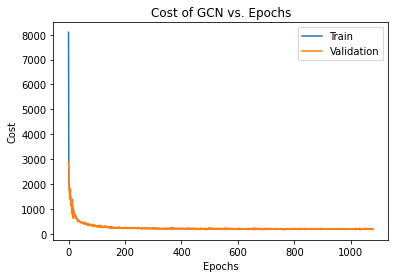

In [ ]:
plt.plot(train_losses)
plt.plot(validation_losses)
plt.title("Cost of GCN vs. Epochs")
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.legend(labels = ["Train","Validation"])
plt.show()

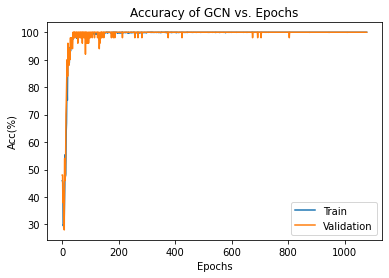

In [ ]:
plt.plot(train_accs)
plt.plot(val_accs)
plt.title("Accuracy of GCN vs. Epochs")
plt.ylabel('Acc(%)')
plt.xlabel('Epochs')
plt.legend(labels = ["Train","Validation"])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

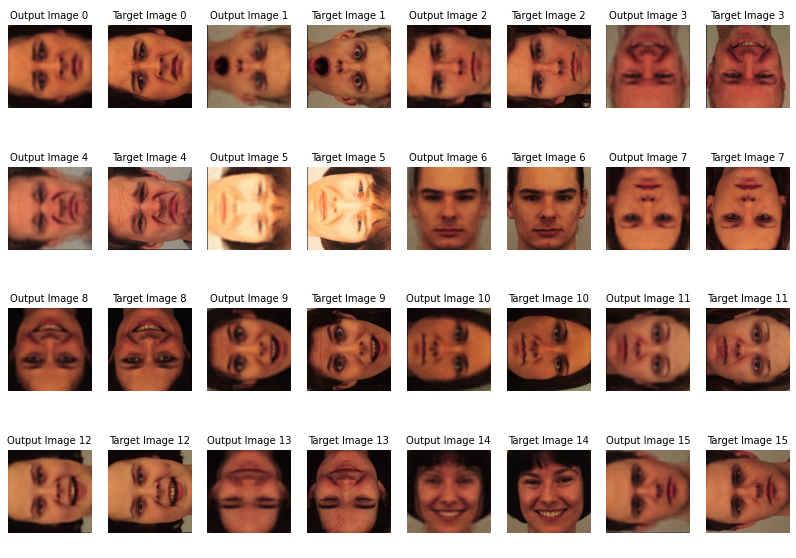

In [ ]:
test_network(batch_train_img_pred[0:16,:,:,:].cpu().detach(),batch_train_img[0:16,:,:,:].cpu().detach(),14,10)

In [ ]:
PATH = '/content/drive/My Drive/GCN6.pth'
torch.save(model.state_dict(), PATH)

In [ ]:
print(train_losses)

[8097.803947897519, 2161.7555649701285, 1951.4644739487592, 1781.3289794921875, 1689.3596119600184, 1642.9850930606617, 1501.2415879193475, 1516.5714183134191, 1343.183640423943, 1227.526013542624, 1151.4625962201287, 1109.1580289952894, 1075.316697064568, 1023.3463152717142, 1019.0783942727481, 1067.3018960391773, 953.4797542796415, 945.8200701545267, 929.9998222799862, 867.9248136632583, 834.6832436954273, 792.2169458725873, 768.4397762522977, 732.3203035242417, 698.493885713465, 675.0339768353631, 665.4534553079044, 635.7525939941406, 630.283353917739, 616.882033404182, 608.1962334127987, 597.5734647863052, 589.0019782571231, 560.6422011431525, 546.1951060575598, 539.7207946777344, 530.8336271398208, 510.76668144674863, 502.73990227194395, 499.881934670841, 486.246119779699, 483.8665044447955, 476.126490873449, 474.92211375517, 467.88416245404414, 460.87057764389937, 458.3953076530905, 465.23870580336626, 449.0313289866728, 460.86907689711626, 450.8168379839729, 436.1067953670726, 4

In [ ]:
print(validation_losses)

[2878.56298828125, 2263.05224609375, 1870.8553466796875, 1633.760986328125, 1404.6314697265625, 1842.7469482421875, 1694.5859375, 1794.0992431640625, 1155.428466796875, 1229.5006103515625, 1103.888671875, 1333.8360595703125, 1014.9862060546875, 782.6814575195312, 1394.86181640625, 879.9996337890625, 626.0444946289062, 968.8268432617188, 989.9252319335938, 822.1173706054688, 878.6085205078125, 708.384765625, 776.931884765625, 664.5267944335938, 706.7039184570312, 758.4896850585938, 611.5452880859375, 605.3895874023438, 693.5008544921875, 590.6138305664062, 591.1441650390625, 587.0432739257812, 546.8418579101562, 508.04852294921875, 485.3125305175781, 548.3482055664062, 525.0318603515625, 540.9702758789062, 509.89776611328125, 504.154052734375, 506.12738037109375, 484.5872497558594, 475.9540100097656, 471.4372863769531, 467.788330078125, 437.6072692871094, 483.4723815917969, 449.1856994628906, 466.87939453125, 455.25421142578125, 443.2594909667969, 448.3493957519531, 403.67669677734375, 

In [ ]:
print(train_accs)

[45.9167, 45.7057, 44.9312, 29.6569, 29.8526, 28.942, 28.7752, 33.1155, 39.3995, 44.7185, 55.4058, 47.515, 48.3915, 53.7224, 64.2021, 66.9475, 76.4263, 80.3547, 75.1872, 84.7375, 89.6463, 90.7748, 89.6667, 89.597, 89.5714, 88.9485, 92.9058, 91.1714, 94.4972, 93.11, 94.0087, 94.7559, 96.4614, 96.5363, 95.847, 97.1337, 98.1618, 97.372, 97.9779, 98.7881, 98.7592, 99.4026, 98.6588, 98.7132, 98.8511, 99.2647, 99.1268, 99.2647, 99.0264, 99.2188, 97.9235, 99.2102, 97.8316, 98.3915, 98.8511, 99.0349, 98.7966, 98.5669, 99.3107, 99.2188, 99.0349, 99.5319, 99.2562, 98.412, 98.989, 99.2562, 99.3566, 98.6673, 98.5209, 98.7881, 99.4945, 99.3481, 99.0809, 99.4026, 99.4945, 99.2647, 98.6673, 98.5669, 99.1268, 99.2188, 99.3021, 99.5864, 99.2562, 98.1158, 99.0724, 99.3107, 99.4945, 99.5404, 99.4026, 99.3021, 99.1268, 99.6324, 99.7702, 99.0349, 98.7252, 99.0349, 99.2188, 99.4945, 99.0809, 99.3941, 99.40257352941177, 99.77022058823529, 99.31066176470588, 99.33959736543542, 98.8885430728688, 99.54044117647

In [ ]:
print(val_accs)

[48.0, 48.0, 38.0, 40.0, 42.0, 30.0, 40.0, 28.0, 54.0, 54.0, 46.0, 48.0, 56.0, 70.0, 74.0, 80.0, 84.0, 90.0, 88.0, 84.0, 96.0, 88.0, 90.0, 94.0, 88.0, 92.0, 94.0, 90.0, 94.0, 98.0, 94.0, 96.0, 98.0, 96.0, 98.0, 96.0, 94.0, 96.0, 100.0, 98.0, 100.0, 100.0, 98.0, 100.0, 98.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 98.0, 100.0, 100.0, 100.0, 96.0, 98.0, 100.0, 100.0, 98.0, 100.0, 100.0, 100.0, 100.0, 100.0, 98.0, 100.0, 98.0, 100.0, 100.0, 100.0, 96.0, 100.0, 100.0, 98.0, 100.0, 100.0, 100.0, 100.0, 100.0, 98.0, 100.0, 92.0, 100.0, 100.0, 100.0, 100.0, 96.0, 100.0, 98.0, 98.0, 96.0, 100.0, 96.0, 98.0, 100.0, 100.0, 100.0, 98.0, 98.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 97.99999594688416, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 97.99999594688416, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 97.99999594688416, 100.0, 100.0, 100.0, 100.0, 100.0, 93.99999976158142, 97.99999594688416, 95.99999785423279, 97.99999594688416, 100.0, 100.0, 100.0, 97.99999

## Testing 

In [ ]:
def test_network(outputs, labels, s1, s2):
    """ 
    Plot test images and the network prediction
    
    Arguments
    ------------
    outputs: torch tensor, of shape (3,n_h,n_w)
    labels : torch tensor, of shape (3,n_h,n_w)
    s1 : First size of figure
    s2 : Second size of figure
    """  
    # create figure
    fig = plt.figure(figsize=(s1, s2))
    
    # setting values to rows and column variables
    rows = int(outputs.shape[0] / 4)
    columns = 8


    for i in range(rows): 
        plt.axis('off')
        # Adds a subplot at the 1st position
        fig.add_subplot(rows, columns, (8*i +1))
        # showing image
        plt.imshow(outputs[4*i,:,:,:].permute(1,2,0)/255,)
        plt.title("Output Image {}".format(4*i),fontsize = 10)

        plt.axis('off')
        # Adds a subplot at the 1st position
        fig.add_subplot(rows, columns, (8*i +2))
        # showing image
        plt.imshow(labels[4*i,:,:,:].permute(1,2,0)/255)
        plt.title("Target Image {}".format(4*i),fontsize = 10)

        plt.axis('off')
        # Adds a subplot at the 2st position
        fig.add_subplot(rows, columns, (8*i +3))
        # showing image
        plt.imshow(outputs[4*i+1,:,:,:].permute(1,2,0)/255)
        plt.title("Output Image {}".format(4*i+1),fontsize = 10)

        plt.axis('off')
        # Adds a subplot at the 2st position
        fig.add_subplot(rows, columns, (8*i +4))
        # showing image
        plt.imshow(labels[4*i+1,:,:,:].permute(1,2,0)/255)
        plt.title("Target Image {}".format(4*i+1),fontsize = 10)
        
        plt.axis('off')
        # Adds a subplot at the 1st position
        fig.add_subplot(rows, columns, (8*i +5))
        # showing image
        plt.imshow(outputs[4*i+2,:,:,:].permute(1,2,0)/255)
        plt.title("Output Image {}".format(4*i+2),fontsize = 10)

        plt.axis('off')
        # Adds a subplot at the 1st position
        fig.add_subplot(rows, columns, (8*i +6))
        # showing image
        plt.imshow(labels[4*i+2,:,:,:].permute(1,2,0)/255)
        plt.title("Target Image {}".format(4*i+2),fontsize = 10)

        plt.axis('off')
        # Adds a subplot at the 2st position
        fig.add_subplot(rows, columns, (8*i +7))
        # showing image
        plt.imshow(outputs[4*i+3,:,:,:].permute(1,2,0)/255)
        plt.title("Output Image {}".format(4*i+3),fontsize = 10)

        plt.axis('off')
        # Adds a subplot at the 2st position
        fig.add_subplot(rows, columns, (8*i +8))
        # showing image
        plt.imshow(labels[4*i+3,:,:,:].permute(1,2,0)/255)
        plt.title("Target Image {}".format(4*i+3),fontsize = 10)
    plt.axis('off')
    return  

In [ ]:
model = GCN()
model = model.to(device)
PATH = '/content/drive/My Drive/GCN6.pth'
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
test_set = KDEFDataset(partition_data['test'], train=False)

test_loader = torch.utils.data.DataLoader(test_set, batch_size=len(test_image_names),
                                             shuffle= False, num_workers=2)

test_dataiter = iter(test_loader)
batch_test_img, batch_test_x_prs, batch_test_x_emt, batch_test_x_trns = test_dataiter.next()
batch_test_img = batch_test_img.float()

# Transfer to GPU
batch_test_img, batch_test_x_prs =  batch_test_img.to(device), batch_test_x_prs.to(device)  
batch_test_x_emt, batch_test_x_trns = batch_test_x_emt.to(device), batch_test_x_trns.to(device) 

# forward
batch_test_img_pred, batch_test_x_prs_pred, batch_test_x_emt_pred, batch_test_x_trns_pred = model(batch_test_x_prs, batch_test_x_emt, batch_test_x_trns)


In [ ]:
# Evaluation
torch.sum(torch.argmax(batch_test_x_emt_pred, dim =1) == torch.argmax(batch_test_x_emt, dim =1)) / batch_test_x_emt.shape[0]

tensor(1., device='cuda:0')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


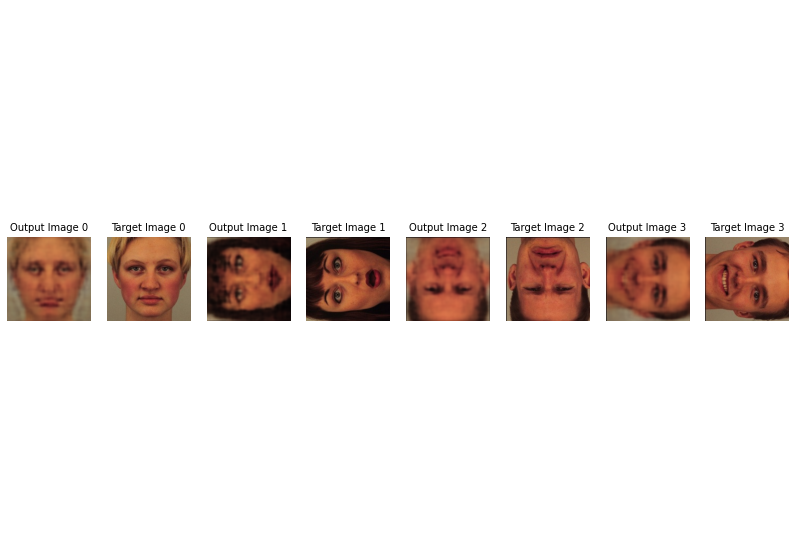

In [ ]:
test_network(batch_test_img_pred[0:9:2,:,:,:].cpu().detach(),batch_test_img[0:9:2,:,:,:].cpu().detach(),14,10)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


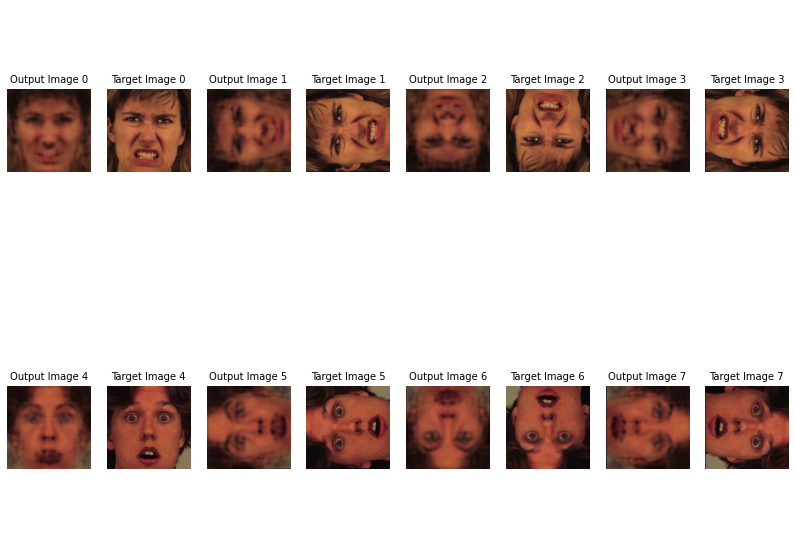

In [ ]:
test_network(batch_test_img_pred[9:25:2,:,:,:].cpu().detach(),batch_test_img[9:25:2,:,:,:].cpu().detach(),14,10)

# Augmentation

## Preprocessing 

### Load the data

create folders for augmented images

In [ ]:
mkdir "/content/drive/My Drive/main_images"

In [ ]:
mkdir "/content/drive/My Drive/augmented_images"

In [ ]:
mkdir "/content/drive/My Drive/images_aug_test"

In [ ]:
session = ['A']
gender = ['F', 'M']
identity = [i for i in range(1,33)]
expression = ['DI', 'HA', 'NE', 'SU']
angle = ['S']
counter = 1

img_names_main = []

for s in session:
  for g in gender:
    for i in identity:
      if i < 10:
        idn = '0' + str(i)
      else:
        idn = str(i)  
      folder_name = s + g + idn
      for e in expression:
        for a in angle:
          image_name = folder_name + e + a + '.JPG'
          img = cv2.imread("/content/KDEF_and_AKDEF/KDEF/"+folder_name+"/"+image_name)
          cropped_img = face_detector(img)  #(158,158,3)
         
          # save images in drive
          new_img_name = e + '_' + str(counter) + '.JPG'
          counter += 1
          img_names_main.append(new_img_name)
          cv2.imwrite('/content/drive/My Drive/256images/'+new_img_name , cropped_img)

In [ ]:
# save
with open("img_names_main.txt", "wb") as fp:   #Pickling
    pickle.dump(img_names_main, fp)

!cp "/content/img_names_main.txt" "/content/drive/My Drive"    

In [ ]:
session = ['A']
gender = ['F', 'M']
identity = [i for i in range(33,36)]
expression = ['DI', 'HA', 'NE', 'SU']
angle = ['S']
counter = 1

img_names_test = []

for s in session:
  for g in gender:
    for i in identity:
      if i < 10:
        idn = '0' + str(i)
      else:
        idn = str(i)  
      folder_name = s + g + idn
      for e in expression:
        for a in angle:
          image_name = folder_name + e + a + '.JPG'
          img = cv2.imread("/content/KDEF_and_AKDEF/KDEF/"+folder_name+"/"+image_name)
          cropped_img = face_detector(img)  #(158,158,3)
         
          # save images in drive
          new_img_name = e + '_' + str(counter) + '.JPG'
          counter += 1
          img_names_test.append(new_img_name)
          cv2.imwrite('/content/drive/My Drive/images_aug_test/'+new_img_name , cropped_img)

In [ ]:
# save
with open("img_names_test.txt", "wb") as fp:   #Pickling
    pickle.dump(img_names_test, fp)

!cp "/content/img_names_test.txt" "/content/drive/My Drive"    

In [ ]:
model = GCN()
model = model.to(device)
PATH = '/content/drive/My Drive/GCN6.pth'
model.load_state_dict(torch.load(PATH))

In [ ]:
x_trns = torch.tensor([1,0,0,0]).unsqueeze(dim=0)
all_emotions = [torch.tensor([1,0,0,0]).unsqueeze(dim=0),
                torch.tensor([0,1,0,0]).unsqueeze(dim=0),
                torch.tensor([0,0,1,0]).unsqueeze(dim=0),
                torch.tensor([0,0,0,1]).unsqueeze(dim=0),
               ]

expression = ['DI', 'HA', 'NE', 'SU']               

In [ ]:
counter = 257
l1 = [i for i in range (0,32)]
l2 = [i for i in range (35,67)]
l = l1 + l2
aug_img_names = []
with torch.set_grad_enabled(False):
    for k in range (len(all_emotions)):
        x_emt = all_emotions[k]
        for p1 in l:
            for p2 in l:
                if p1 != p2:
                    x_prs = torch.zeros(70)
                    x_prs[p1] = 0.5
                    x_prs[p2] = 0.5
                    x_prs = x_prs.unsqueeze(dim=0)
                    # Transfer to GPU
                    x_prs =  x_prs.to(device)  
                    x_emt, x_trns = x_emt.to(device), x_trns.to(device)                 
                    # Model computations
                    # forward + backward + optimize
                    img_pred, _, _, _ = model(x_prs.to(torch.float32), x_emt.to(torch.float32), x_trns.to(torch.float32))
                    img_pred = img_pred[0,:,:,:].permute(1,2,0).cpu().detach().numpy()
                    # save augmented image
                    img_name = expression[k] + '_' + str(counter) + '.JPG'
                    aug_img_names.append(img_name)
                    counter += 1
                    cv2.imwrite('/content/drive/My Drive/augmented_images/'+img_name , img_pred)

      

In [ ]:
!zip -r  '/content/drive/My Drive/images_aug_test.zip' '/content/drive/My Drive/images_aug_test'
!zip -r  '/content/drive/My Drive/main_images.zip' '/content/drive/My Drive/main_images'
!zip -r  '/content/drive/My Drive/combined_images.zip' '/content/drive/My Drive/combined_images'

for the sake of speed in reading files, we copy folders to content

In [ ]:
!unzip '/content/drive/My Drive/images_aug_test.zip' -d/content
!unzip '/content/drive/My Drive/main_images.zip' -d/content
!unzip '/content/drive/My Drive/combined_images.zip' -d/content

In [ ]:
# load
with open(r"/content/drive/My Drive/img_names_test.txt", "rb") as fp:   # Unpickling
    img_names_test = pickle.load(fp)

# load
with open(r"/content/drive/My Drive/img_names_main.txt", "rb") as fp:   # Unpickling
    img_names_main = pickle.load(fp)

# load
with open(r"/content/drive/My Drive/aug_img_names.txt", "rb") as fp:   # Unpickling
    aug_img_names = pickle.load(fp)

In [ ]:
expression = ['DI', 'HA', 'NE', 'SU']
emotions = {}
k = 0
for e in expression:   
      emotions[e] = k
      k += 1

### Dataset

In [ ]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, indices, root, names_list):
        self.indices = indices
        self.root = root 
        self.names_list = names_list

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, ind):
        img_name = self.names_list[ind]
        img = cv2.imread(self.root + img_name)
        if type(img) != np.ndarray:
            print(img_name)
            img = cv2.imread("/content/main_images/" + img_name)
        
        # create emotion one-hot vector
        emotion_one_hot = torch.zeros(4,1)
        emotion_number = emotions[img_name[0:2]]
        emotion_one_hot[emotion_number,0] = 1

        return torch.from_numpy(img).permute(2,0,1), emotion_one_hot.squeeze()

### Train and Test split 

In [ ]:
torch.manual_seed(10)
random.seed(10)

train_indices = [i for i in range(len(img_names_main))]
test_indices =  [i for i in range(len(img_names_test))]

partition_data = {'train' : train_indices , 
                  'test' : test_indices}         

torch.manual_seed(10)
random.seed(10)
torch.manual_seed(10)
random.seed(10)

train_root = "/content/main_images/"
test_root = "/content/images_aug_test/"

training_set = Dataset(partition_data['train'], train_root, img_names_main)

training_loader = torch.utils.data.DataLoader(training_set, batch_size= 64,
                                             shuffle=True, num_workers=2)

test_set = Dataset(partition_data['test'], test_root, img_names_test)

test_loader = torch.utils.data.DataLoader(test_set, batch_size=len(img_names_test),
                                             shuffle=True, num_workers=2)

## Emotion Classifier

In [ ]:
class emt_classifier(nn.Module):
  def __init__(self):
    super(emt_classifier,self).__init__()

    alexnet=models.alexnet()
    features=alexnet.features
    features[0]=nn.Conv2d(3,64,kernel_size=(11, 11),stride=(2,2),padding=(2, 2))
    features[1]=nn.LeakyReLU(negative_slope=0.2, inplace=True)
    features[4]=nn.LeakyReLU(negative_slope=0.2, inplace=True)
    features[7]=nn.LeakyReLU(negative_slope=0.2, inplace=True)
    features[9]=nn.LeakyReLU(negative_slope=0.2, inplace=True)
    features[11]=nn.LeakyReLU(negative_slope=0.2, inplace=True)
    features=list(features.children())
    features.insert(2,nn.BatchNorm2d(64))
    features.insert(6,nn.BatchNorm2d(192))
    self.features = nn.Sequential(*features)

    layers_list=[nn.Linear(256*8*8,4096),
                 nn.LeakyReLU(negative_slope=0.2, inplace=True),
                 nn.Dropout(0.5),
                 nn.Linear(4096,4096),
                 nn.LeakyReLU(negative_slope=0.2, inplace=True),
                 nn.Dropout(0.5)]


    emotion_clsfr_layers=layers_list+[nn.Linear(4096,5)]

    self.flatten = nn.Flatten()

    self.emo_classifier=nn.Sequential(*emotion_clsfr_layers)

  def forward(self,x):
    x=self.features(x)
    x=self.flatten(x)

    emotions=self.emo_classifier(x)

    return emotions 

### Train and Test 

In [ ]:
torch.manual_seed(10)
random.seed(10)
# Model
model = emt_classifier()
model = model.to(device)

# Hyperparameters
learning_rate = 5e-5
max_epochs = 20

torch.manual_seed(10)
random.seed(10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate, betas=(0.9, 0.99), eps=1e-8)

In [ ]:
torch.manual_seed(10)
random.seed(10)
train_losses = []
validation_losses = []
train_accs = []
val_accs = []

for epoch in tqdm(range(max_epochs)):
    running_trainloss, running_valloss, running_loss, train_acc, val_acc = 0.0, 0.0, 0.0, 0.0, 0.0
    train_cnt, val_cnt = 0, 0
        
    # Training
    for batch_train_img, batch_train_x_emt in tqdm(training_loader):
        batch_train_img = batch_train_img.float()
        # Transfer to GPU
        batch_train_img =  batch_train_img.to(device)  
        batch_train_x_emt = batch_train_x_emt.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()
        
        # Model computations
        # forward + backward + optimize
        batch_train_x_emt_pred = model(batch_train_img)

        loss = criterion(batch_train_x_emt_pred,torch.argmax(batch_train_x_emt, dim = 1))
        loss.backward()

        # # Clip to avoid exploding gradient issues, makes sure grads are within a healthy range
        nn.utils.clip_grad_norm_(model.parameters(), max_norm= 5,error_if_nonfinite= False)

        optimizer.step()

        # print statistics
        running_trainloss += loss.item()
        running_loss += loss.item()

        
        train_acc += torch.sum(torch.argmax(batch_train_x_emt_pred, dim =1) == torch.argmax(batch_train_x_emt, dim =1)) / batch_train_x_emt.shape[0]
        # print(train_acc)
        if train_cnt % 2 == 1:    # print every 10 mini-batches
            print("Cost of Train data after %i iterations in epoch %i : %f" %(train_cnt + 1,epoch + 1, running_loss / 50))
            running_loss = 0.0
        
        train_cnt += 1

    scheduler.step()
    train_losses.append(running_trainloss / train_cnt)
    train_accs.append(train_acc / train_cnt * 100)

    #Validation
    with torch.set_grad_enabled(False):
        val_cnt = 1
        for batch_img, batch_x_emt in tqdm(test_loader):
            batch_img = batch_img.float()

            # Transfer to GPU
            batch_img = batch_img.to(device) 
            batch_x_emt = batch_x_emt.to(device)
            
            # Model computations
            # forward + backward + optimize
            batch_x_emt_pred = model(batch_img)
            
            val_loss = criterion(batch_x_emt_pred, torch.argmax(batch_x_emt, dim = 1))

            running_valloss += val_loss.item()
            val_cnt += 1

            val_acc = torch.sum(torch.argmax(batch_x_emt_pred, dim =1) == torch.argmax(batch_x_emt, dim =1)) / batch_x_emt.shape[0]
            val_accs.append(val_acc)
    validation_losses.append(running_valloss / train_cnt)


In [ ]:
plt.plot(train_losses)
plt.plot(validation_losses)
plt.legend(['train','test'])
plt.show()

In [ ]:
train_accs

In [ ]:
val_accs

In [ ]:
torch.manual_seed(10)
random.seed(10)

combined_indices = [i for i in range(len(img_names_main) + len(aug_img_names))]

partition_data = {'train' : combined_indices}
                          

torch.manual_seed(10)
random.seed(10)
torch.manual_seed(10)
random.seed(10)


combined_root = "/content/combined_images/"

training_set = Dataset(partition_data['train'], combined_root, img_names_main + aug_img_names)

training_loader = torch.utils.data.DataLoader(training_set, batch_size= 64,
                                             shuffle=True, num_workers=2)

In [ ]:
torch.manual_seed(10)
random.seed(10)
# Model
model = emt_classifier()
model = model.to(device)

# Hyperparameters
learning_rate = 5e-5
max_epochs = 12

torch.manual_seed(10)
random.seed(10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate, betas=(0.9, 0.99), eps=1e-8)

In [ ]:
torch.manual_seed(10)
random.seed(10)
train_losses = []
validation_losses = []
train_accs = []
val_accs = []

for epoch in tqdm(range(max_epochs)):
    running_trainloss, running_valloss, running_loss, train_acc, val_acc = 0.0, 0.0, 0.0, 0.0, 0.0
    train_cnt, val_cnt = 0, 0
        
    # Training
    for batch_train_img, batch_train_x_emt in tqdm(training_loader):
        batch_train_img = batch_train_img.float()
        # Transfer to GPU
        batch_train_img =  batch_train_img.to(device)  
        batch_train_x_emt = batch_train_x_emt.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()
        
        # Model computations
        # forward + backward + optimize
        batch_train_x_emt_pred = model(batch_train_img)

        loss = criterion(batch_train_x_emt_pred,torch.argmax(batch_train_x_emt, dim = 1))
        loss.backward()

        # # Clip to avoid exploding gradient issues, makes sure grads are within a healthy range
        nn.utils.clip_grad_norm_(model.parameters(), max_norm= 5,error_if_nonfinite= False)

        optimizer.step()

        # print statistics
        running_trainloss += loss.item()
        running_loss += loss.item()

        train_acc += torch.sum(torch.argmax(batch_train_x_emt_pred, dim =1) == torch.argmax(batch_train_x_emt, dim =1)) / batch_train_x_emt.shape[0]

        if train_cnt % 50 == 49:    # print every 10 mini-batches
            print("Cost of Train data after %i iterations in epoch %i : %f" %(train_cnt + 1,epoch + 1, running_loss / 50))
            running_loss = 0.0
        
        train_cnt += 1

    scheduler.step()
    train_losses.append(running_trainloss / train_cnt)
    train_accs.append(train_acc / train_cnt * 100)

    #Validation
    with torch.set_grad_enabled(False):
        val_cnt = 1
        for batch_img, batch_x_emt in tqdm(test_loader):
            batch_img = batch_img.float()

            # Transfer to GPU
            batch_img = batch_img.to(device) 
            batch_x_emt = batch_x_emt.to(device)
            
            # Model computations
            # forward + backward + optimize
            batch_x_emt_pred = model(batch_img)
            
            val_loss = criterion(batch_x_emt_pred, torch.argmax(batch_x_emt, dim = 1))

            running_valloss += val_loss.item()
            val_cnt += 1

            val_acc = torch.sum(torch.argmax(batch_x_emt_pred, dim =1) == torch.argmax(batch_x_emt, dim =1)) / batch_x_emt.shape[0]
            val_accs.append(val_acc)
    validation_losses.append(running_valloss / train_cnt)


In [ ]:
plt.plot(train_losses)
plt.plot(validation_losses)
plt.legend(['train','test'])
plt.show()

In [ ]:
val_accs

# QMNIST Dataset

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
from keras.datasets import mnist
from os import listdir
import torch
import random
import tensorflow as tf
import os
import sys
import struct
import matplotlib.pyplot as plt
import numpy as np
import math 
import os, sys 
import shutil
import cv2
from google.colab.patches import cv2_imshow
import imutils
import pickle
import random 
import matplotlib.pyplot as plt
import string
torch.manual_seed(10)
random.seed(10)
import torch 
from torch import Tensor
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
from typing import Callable, List, Optional, Tuple
from torch.nn.utils.rnn import pad_sequence 
from torch.optim.lr_scheduler import MultiStepLR, StepLR
import torch.optim as optim
from tqdm.notebook import tqdm
import gzip

## Preprocessing

### Download the dataset

In [ ]:
from torchvision.datasets import QMNIST

qtrain = QMNIST('train_qmnist', train=True, download=True) 
# qtest = QMNIST('test_qmnist', what='test', download=True)

### Load the dataset

In [ ]:
# credit: https://www.programmersought.com/article/54863640507/


def load_mnist(path, kind='train'): 
    labels_path = os.path.join(path, 
                               'qmnist-%s-labels-idx2-int' 
                               % kind) 
    images_path = os.path.join(path, 
                               'qmnist-%s-images-idx3-ubyte' 
                               % kind) 
    with open(labels_path, 'rb') as lbpath: 
        magic, n, m = struct.unpack('>III', 
                                 lbpath.read(12)) 
        labels = np.fromfile(lbpath, 
                             dtype=np.dtype('>i4')) 
  
        labels=labels.reshape(n, 8) 
        print(labels.shape) 
  
    with open(images_path, 'rb') as imgpath: 
        magic, num, rows, cols = struct.unpack('>IIII', 
                                               imgpath.read(16)) 
        images = np.fromfile(imgpath, 
                             dtype=np.uint8)  #np.byte=np.uint8,all of them are 8 bits 
  
        images=images.reshape(num, 784) 
        print(images.shape)
    
  
    return images, labels


In [ ]:
qmnist_train=load_mnist('/content/train_qmnist/QMNIST/raw/')
x_train=qmnist_train[0]
x_train=x_train.reshape(-1,28,28)
y_train=qmnist_train[1]

# qmnist_test=load_mnist('/content/test_qmnist/QMNIST/raw/',kind='test')
# x_test=qmnist_test[0]
# x_test=x_test.reshape(-1,28,28)
# y_test=qmnist_test[1]

In [ ]:
writer_ids={i:0 for i in y_train[:,2]}

for i in y_train[:,2]:
  writer_ids[i]=writer_ids[i]+1

writer_ids_list=[]
for id in writer_ids:
  writer_ids_list.append(id)

k=10


selected_ids=[57,6,61,2340,188,193,102,2313,30,2130]

nums={j:{i:[] for i in range(10)} for j in selected_ids}

for i,lab in enumerate(y_train):
  if lab[2] in nums:
    the_id=lab[2]
    the_num=lab[0]
    nums[the_id][the_num].append(i)

picked_nums=nums

ids_code={selected_ids[i]:i for i in range(k)}

In [ ]:
iter=0
length=[]
for id in selected_ids:
  for i in range(10):
    for the_num in picked_nums[id][i]:
      pic_name=str(iter)+'_'+str(ids_code[id])+'_'+str(i)+'.jpg'
      pic=x_train[the_num]
      
      length.append(pic_name)
      iter=iter+1
print(len(length))

In [ ]:
!mkdir qmnist_dataset
dataset_dir='/content/qmnist_dataset'
iter=0

for id in selected_ids:
  for i in range(10):
    for the_num in picked_nums[id][i]:
      pic_name=str(iter)+'_'+str(ids_code[id])+'_'+str(i)+'.jpg'
      pic=x_train[the_num]

      pic=Image.fromarray(pic)
      pic.save(dataset_dir+"/"+pic_name)
      iter=iter+1

In [ ]:
#0 for red
#1 for green
#2 for blue
!mkdir colored
colored_dir='/content/colored'

dataset_names=listdir(dataset_dir)

for name in dataset_names:

  im=Image.open(dataset_dir+'/'+name)
  im=np.array(im)

  name=name.split('.jpg')[0]

  red_im=np.zeros((28,28,3))
  red_im[:,:,0]=im/255
  red_dir=colored_dir+'/'+str(name)+'_'+str(0)+'.jpg'
  plt.imsave(red_dir,red_im)

  green_im=np.zeros((28,28,3))
  green_im[:,:,1]=im/255
  green_dir=colored_dir+'/'+str(name)+'_'+str(1)+'.jpg'
  plt.imsave(green_dir,green_im)

  blue_im=np.zeros((28,28,3))
  blue_im[:,:,2]=im/255
  blue_dir=colored_dir+'/'+str(name)+'_'+str(2)+'.jpg'
  plt.imsave(blue_dir,blue_im)

In [ ]:
#0 for 0 rotation
#1 for 90 rotation
#2 for 180 rotation
#3 for 270 rotation
!mkdir qmnist_transformed
transformed_dir='/content/qmnist_transformed'

colored_names=listdir(colored_dir)

for name in colored_names:
  im=Image.open(colored_dir+'/'+name)
  im=np.array(im)

  name=name.split('.jpg')[0]

  dir_000=transformed_dir+'/'+name+'_0.jpg'
  plt.imsave(dir_000,im)

  im90=cv2.rotate(im, cv2.ROTATE_90_CLOCKWISE)
  dir_090=transformed_dir+'/'+name+'_1.jpg'
  plt.imsave(dir_090,im90)

  im180=cv2.rotate(im, cv2.ROTATE_180)
  dir_180=transformed_dir+'/'+name+'_2.jpg'
  plt.imsave(dir_180,im180)

  im270=cv2.rotate(im, cv2.ROTATE_90_COUNTERCLOCKWISE)
  dir_270=transformed_dir+'/'+name+'_3.jpg'
  plt.imsave(dir_270,im270)

In [ ]:
torch.manual_seed(10)
random.seed(10)

transformed_dir='/content/qmnist_transformed'
pic_names=listdir(transformed_dir)

test_pics=[]

for name in pic_names:
  name_s=name.split('.jpg')[0]
  name_s=name_s.split("_")
  if name_s[1]=='0':
    if name_s[2]=='0':
      if name_s[3]=='0':
        test_pics.append(name)
  if name_s[1]=='1':
    if name_s[2]=='1':
      if name_s[3]=='1':
        test_pics.append(name)
  if name_s[1]=='2':
    if name_s[2]=='6':
      if name_s[3]=='2':
        test_pics.append(name)
  if name_s[1]=='3':
    if name_s[2]=='8':
      if name_s[3]=='0':
        test_pics.append(name)
  if name_s[1]=='4':
    if name_s[2]=='9':
      if name_s[3]=='2':
        test_pics.append(name)
  if name_s[1]=='5':
    if name_s[2]=='2':
      if name_s[4]=='1':
        test_pics.append(name)
  if name_s[1]=='6':
    if name_s[2]=='3':
      if name_s[4]=='2':
        test_pics.append(name)
  if name_s[1]=='7':
    if name_s[2]=='4':
      if name_s[4]=='3':
        test_pics.append(name)
  if name_s[1]=='8':
    if name_s[2]=='5':
      if name_s[4]=='1':
        test_pics.append(name)
  if name_s[1]=='9':
    if name_s[2]=='7':
      if name_s[4]=='2':
        test_pics.append(name)

train_pics=list(set(pic_names)-set(test_pics))

random.shuffle(train_pics)

train_indices = [i for i in range(len(train_pics))]
test_indices =  [i for i in range(len(test_pics))]

partition_data = {'train' : train_indices , 
                  'test' : test_indices}
      

### Dataset class

In [ ]:
class qMNISTDataset(torch.utils.data.Dataset):
  def __init__(self, indices, train=True):
    self.indices = indices
    self.train = train 

  def __len__(self):
    return len(self.indices)

  def __getitem__(self, ind):
    if self.train:
      img_name = train_pics[ind]
      img = cv2.imread("/content/qmnist_transformed/"+ img_name)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

      splitted=img_name.split('.jpg')[0]
      splitted=splitted.split('_')


      # create identity one-hot vector
      idn_one_hot = torch.zeros(10,1)
      idn_number = int(splitted[1])
      idn_one_hot[idn_number,0] = 1


      #create num one
      num_one_hot = torch.zeros(10,1)
      num_number = int(splitted[2])
      num_one_hot[num_number,0] = 1

      # create color one-hot vector
      color_one_hot = torch.zeros(3,1)
      color_number = int(splitted[3])
      color_one_hot[color_number,0] = 1

      # create transformation one-hot vector
      transform_one_hot = torch.zeros(4,1)
      transform_number = int(splitted[4])
      transform_one_hot[transform_number,0] = 1

    else:
      img_name = test_pics[ind]
      img = cv2.imread("/content/qmnist_transformed/"+img_name)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

      splitted=img_name.split('.jpg')[0]
      splitted=splitted.split('_')

      # create identity one-hot vector
      idn_one_hot = torch.zeros(10,1)
      idn_number = int(splitted[1])
      idn_one_hot[idn_number,0] = 1


      #create num one
      num_one_hot = torch.zeros(10,1)
      num_number = int(splitted[2])
      num_one_hot[num_number,0] = 1

      # create color one-hot vector
      color_one_hot = torch.zeros(3,1)
      color_number = int(splitted[3])
      color_one_hot[color_number,0] = 1

      # create transformation one-hot vector
      transform_one_hot = torch.zeros(4,1)
      transform_number = int(splitted[4])
      transform_one_hot[transform_number,0] = 1 

    return torch.from_numpy(img).permute(2,0,1), idn_one_hot.squeeze(),num_one_hot.squeeze(), color_one_hot.squeeze(), transform_one_hot.squeeze()

### Train and test split 

In [ ]:
torch.manual_seed(10)
random.seed(10)

training_set = qMNIST(partition_data['train'])

training_loader = torch.utils.data.DataLoader(training_set, batch_size= 64,
                                             shuffle=True, num_workers=2)

test_set = qMNIST(partition_data['test'], train=False)

test_loader = torch.utils.data.DataLoader(test_set, batch_size=len(test_pics),
                                             shuffle=True, num_workers=2)

## GCN Network

In [ ]:
class _generator(nn.Module):

    def __init__(self):
        super(_generator, self).__init__()
        
        self.lrelu = nn.LeakyReLU(0.1)
        self.relu=nn.ReLU()
        
        self.fc1_prs = nn.Linear(10, 256)
        self.fc1_num=nn.Linear(10, 256)
        self.fc1_emt = nn.Linear(3, 32)
        self.fc1_trns = nn.Linear(4, 128)

        self.fc2_prs = nn.Linear(256, 512)
        self.fc2_num = nn.Linear(256, 512)
        self.fc2_emt = nn.Linear(32, 64)
        self.fc2_trns = nn.Linear(128, 256)

        self.fc3 = nn.Linear(1344, 2048)

        self.fc4 = nn.Linear(2048, 2048)

        self.fc5 = nn.Linear(2048, 16384)

        self.uconv6 = nn.ConvTranspose2d(256, 256, 4, stride = 2, padding = 1)

        self.conv6=nn.Conv2d(256,256,3,stride=1,padding=1)

        self.uconv7 = nn.ConvTranspose2d(256, 3, 2, stride = 2, padding = 2)


    def forward(self,x_id, x_num, x_clr, x_trns):
        x_id = self.fc1_prs(x_id)
        x_num=self.fc1_num(x_num)
        x_clr = self.fc1_emt(x_clr)
        x_trns = self.fc1_trns(x_trns)

        x_id = self.lrelu(x_id)
        x_num = self.lrelu(x_num)
        x_clr = self.lrelu(x_clr)
        x_trns = self.lrelu(x_trns)

        x_id = self.fc2_prs(x_id)
        x_num = self.fc2_num(x_num)
        x_clr = self.fc2_emt(x_clr)
        x_trns = self.fc2_trns(x_trns)

        x = torch.cat((x_id,x_num,x_clr,x_trns), dim = 1)
        x = self.lrelu(x)

        x = self.fc3(x)
        x = self.lrelu(x)

        x = self.fc4(x)
        x = self.lrelu(x)

        x = self.fc5(x)
        x = self.lrelu(x)

        x = x.view(-1, 256, 8, 8)
        
        x = self.uconv6(x)
        x = self.lrelu(x)

        x = self.conv6(x)
        x = self.lrelu(x)

        x = self.uconv7(x)
        x = self.relu(x)
        
        return x 

In [ ]:
class _classifier1(nn.Module):
  def __init__(self):
    super(_classifier1,self).__init__()

    self.conv1=nn.Conv2d(3,128,2,stride = 2)
    self.BN1=nn.BatchNorm2d(128)
    self.conv2=nn.Conv2d(128,256,4,stride=2,padding=2)
    self.BN2=nn.BatchNorm2d(256)

    self.lr=nn.LeakyReLU(negative_slope=0.2, inplace=True)

    layers_list=[nn.Linear(256*8*8,4096),
                 nn.LeakyReLU(negative_slope=0.2, inplace=True),
                 nn.Dropout(0.5),
                 nn.Linear(4096,1024),
                 nn.LeakyReLU(negative_slope=0.2, inplace=True),
                 nn.Dropout(0.5)]

    layers_list2=[nn.Linear(256*8*8,4096),
                 nn.LeakyReLU(negative_slope=0.2, inplace=True),
                 nn.Dropout(0.5),
                 nn.Linear(4096,4096),
                 nn.LeakyReLU(negative_slope=0.2, inplace=True),
                 nn.Dropout(0.5)]

    id_clsfr_layers=layers_list2+[nn.Linear(4096,10)]
    number_clsfr_layers=layers_list+[nn.Linear(1024,10)]
    color_clsfr_layers=layers_list+[nn.Linear(1024,3)]
    transformation_clsfr_layers=layers_list+[nn.Linear(1024,4)]

    self.flatten=nn.Flatten()

    self.id_classifier=nn.Sequential(*id_clsfr_layers)
    self.num_classifier=nn.Sequential(*number_clsfr_layers)
    self.clr_classifier=nn.Sequential(*color_clsfr_layers)
    self.tr_classifier=nn.Sequential(*transformation_clsfr_layers)

  def forward(self,x):
    x=self.BN1(self.lr(self.conv1(x)))
    x=self.BN2(self.lr(self.conv2(x)))

    x=self.flatten(x)

    the_ids=self.id_classifier(x)
    the_nums=self.num_classifier(x)
    the_colors=self.clr_classifier(x)
    transformations=self.tr_classifier(x)

    return the_ids,the_nums,the_colors,transformations



In [ ]:
class GCN(nn.Module):

    def __init__(self):
        super(GCN, self).__init__()
        
        self.gen = _generator()
        self.clsf = _classifier1()

    def forward(self,x_id, x_num, x_clr, x_trns):
        img_pred = self.gen(x_id, x_num, x_clr, x_trns)
        x_id_pred,x_num_pred, x_clr_pred, x_trns_pred = self.clsf(img_pred)

        return img_pred,x_id_pred, x_num_pred, x_clr_pred, x_trns_pred

## Train

In [ ]:
# Hyperparameters
learning_rate = 2e-4
max_epochs = 30

# # Model
model = GCN()
model = model.to(device)

# Define Loss function and Optimizer
criterion1 = nn.CrossEntropyLoss()
criterion2 = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr = learning_rate, betas=(0.9, 0.995), eps=1e-8)
scheduler = StepLR(optimizer, step_size = 30, gamma = 0.5)

train_losses = []
validation_losses = []

train_accs = []

# torch.autograd.set_detect_anomaly(True)
for epoch in tqdm(range(max_epochs)):
    running_trainloss, running_valloss, running_loss, train_acc = 0.0, 0.0, 0.0, 0.0
    train_cnt, val_cnt = 0, 0
        
    # Training
    for batch_train_img,batch_train_x_id, batch_train_x_num, batch_train_x_clr, batch_train_x_trns in tqdm(training_loader):
        batch_train_img = batch_train_img.float()
        # Transfer to GPU
        batch_train_x_id=batch_train_x_id.to(device)
        batch_train_img, batch_train_x_num =  batch_train_img.to(device), batch_train_x_num.to(device)  
        batch_train_x_clr, batch_train_x_trns = batch_train_x_clr.to(device), batch_train_x_trns.to(device) 

        # zero the parameter gradients
        optimizer.zero_grad()
        
        # Model computations
        # forward + backward + optimize
        batch_train_img_pred, batch_train_x_id_pred,batch_train_x_num_pred, batch_train_x_clr_pred, batch_train_x_trns_pred = model(batch_train_x_id,batch_train_x_num, batch_train_x_clr, batch_train_x_trns)

        loss0 = criterion1(batch_train_x_id_pred,torch.argmax(batch_train_x_id, dim = 1))
        loss1 = criterion1(batch_train_x_num_pred,torch.argmax(batch_train_x_num, dim = 1))
        loss2 = criterion1(batch_train_x_clr_pred,torch.argmax(batch_train_x_clr, dim = 1))
        loss3 = criterion1(batch_train_x_trns_pred,torch.argmax(batch_train_x_trns, dim = 1))
        loss4 = criterion2(batch_train_img_pred,batch_train_img)

        loss = 10*loss0+10 * loss1 + 10 * loss2 + 10 * loss3 + loss4 
        loss.backward()

        # # Clip to avoid exploding gradient issues, makes sure grads are within a healthy range
        nn.utils.clip_grad_norm_(model.parameters(), max_norm= 1,error_if_nonfinite= False)

        optimizer.step()

        # print statistics
        running_trainloss += loss.item()
        running_loss += loss.item()

        train_acc += torch.sum(torch.argmax(batch_train_x_id_pred, dim =1) == torch.argmax(batch_train_x_id, dim =1)) / batch_train_x_id.shape[0]

        if train_cnt % 35 == 34:    # print every 10 mini-batches
            print("Cost of Train data after %i iterations in epoch %i : %f" %(train_cnt + 1,epoch + 1, running_loss / 35))
            running_loss = 0.0
        
        train_cnt += 1

    scheduler.step()
    train_losses.append(running_trainloss / train_cnt)
    train_accs.append(train_acc / train_cnt * 100)

In [ ]:
plt.plot(train_losses)
plt.title("Cost of GCN vs. Epochs")
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.legend(labels = ["Train"])
plt.show()

In [ ]:
plt.plot(train_accs)
plt.title("Accuracy of GCN vs. Epochs")
plt.ylabel('Acc(%)')
plt.xlabel('Epochs')
plt.legend(labels = ["Train"])
plt.show()

In [ ]:
sam=20
tt=random.choices(list(range(batch_train_img_pred.size(0))),k=sam)
L=len(tt)
half_L=int(L/2)

plt.figure(figsize=(15,15))
i=0
for i in range(half_L):
  im=batch_train_img_pred[tt[i]].permute(1,2,0).cpu().detach().numpy()
  plt.subplot(half_L,half_L,i+1)
  plt.imshow(im/255)
  ax = plt.gca()
  ax.axes.xaxis.set_visible(False)
  ax.axes.yaxis.set_visible(False)
  if i==0:
    plt.ylabel('generated')
    ax.axes.yaxis.set_visible(True)
  i=1
i=0
for i in range(half_L):
  im=batch_train_img[tt[i]].permute(1,2,0).cpu().detach().numpy()
  plt.subplot(half_L,half_L,half_L+i+1)
  plt.imshow(im/255)
  ax = plt.gca()
  ax.axes.xaxis.set_visible(False)
  ax.axes.yaxis.set_visible(False)
  if i==0:
    plt.ylabel('actual')
    ax.axes.yaxis.set_visible(True)
  i=1
i=0
for i in range(half_L):
  im=batch_train_img_pred[tt[i+half_L]].permute(1,2,0).cpu().detach().numpy()
  plt.subplot(half_L,half_L,2*half_L+i+1)
  plt.imshow(im/255)
  ax = plt.gca()
  ax.axes.xaxis.set_visible(False)
  ax.axes.yaxis.set_visible(False)
  if i==0:
    plt.ylabel('generated')
    ax.axes.yaxis.set_visible(True)
  i=1
i=0
for i in range(half_L):
  im=batch_train_img[tt[i+half_L]].permute(1,2,0).cpu().detach().numpy()
  plt.subplot(half_L,half_L,3*half_L+i+1)
  plt.imshow(im/255)
  ax = plt.gca()
  ax.axes.xaxis.set_visible(False)
  ax.axes.yaxis.set_visible(False)
  if i==0:
    plt.ylabel('actual')
    ax.axes.yaxis.set_visible(True)
  i=1


## Test

In [ ]:
test_set = KDEFDataset(partition_data['test'], train=False)

test_loader = torch.utils.data.DataLoader(test_set, batch_size=len(test_pics),
                                             shuffle=True, num_workers=2)
for batch_test_img,batch_test_x_id, batch_test_x_num, batch_test_x_clr, batch_test_x_trns in tqdm(test_loader):
  batch_test_img = batch_test_img.float()
  # Transfer to GPU
  batch_test_x_id=batch_test_x_id.to(device)
  batch_test_img, batch_test_x_num =  batch_test_img.to(device), batch_test_x_num.to(device)  
  batch_test_x_clr, batch_test_x_trns = batch_test_x_clr.to(device), batch_test_x_trns.to(device) 

  # zero the parameter gradients
  optimizer.zero_grad()
  
  # Model computations
  # forward + backward + optimize
  batch_test_img_pred, batch_test_x_id_pred,batch_test_x_num_pred, batch_test_x_clr_pred, batch_test_x_trns_pred = model(batch_test_x_id,batch_test_x_num, batch_test_x_clr, batch_test_x_trns)


In [ ]:
sam=20
tt=random.choices(list(range(batch_test_img_pred.size(0))),k=sam)
L=len(tt)
half_L=int(L/2)

plt.figure(figsize=(15,15))
i=0
for i in range(half_L):
  im=batch_test_img_pred[tt[i]].permute(1,2,0).cpu().detach().numpy()
  plt.subplot(half_L,half_L,i+1)
  plt.imshow(im/255)
  ax = plt.gca()
  ax.axes.xaxis.set_visible(False)
  ax.axes.yaxis.set_visible(False)
  if i==0:
    plt.ylabel('generated')
    ax.axes.yaxis.set_visible(True)
  i=1
i=0
for i in range(half_L):
  im=batch_test_img[tt[i]].permute(1,2,0).cpu().detach().numpy()
  plt.subplot(half_L,half_L,half_L+i+1)
  plt.imshow(im/255)
  ax = plt.gca()
  ax.axes.xaxis.set_visible(False)
  ax.axes.yaxis.set_visible(False)
  if i==0:
    plt.ylabel('actual')
    ax.axes.yaxis.set_visible(True)
  i=1
i=0
for i in range(half_L):
  im=batch_test_img_pred[tt[i+half_L]].permute(1,2,0).cpu().detach().numpy()
  plt.subplot(half_L,half_L,2*half_L+i+1)
  plt.imshow(im/255)
  ax = plt.gca()
  ax.axes.xaxis.set_visible(False)
  ax.axes.yaxis.set_visible(False)
  if i==0:
    plt.ylabel('generated')
    ax.axes.yaxis.set_visible(True)
  i=1
i=0
for i in range(half_L):
  im=batch_test_img[tt[i+half_L]].permute(1,2,0).cpu().detach().numpy()
  plt.subplot(half_L,half_L,3*half_L+i+1)
  plt.imshow(im/255)
  ax = plt.gca()
  ax.axes.xaxis.set_visible(False)
  ax.axes.yaxis.set_visible(False)
  if i==0:
    plt.ylabel('actual')
    ax.axes.yaxis.set_visible(True)
  i=1
